In [1]:
import matplotlib.pyplot as plt
import numpy as np

import GWPhotonCounting

from jax.scipy.special import logsumexp
from jax.lax import cumlogsumexp

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'axes.titlesize':12,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import glob, json
from tqdm import tqdm 



Nevents = 1000

loglikelihoods_strain = []
loglikelihoods_strain_lorentzian = []
loglikelihoods_strain_no_noise = []
loglikelihoods_strain_lorentzian_no_noise = []

snrs = []
snrs_silica = []
indices = []

file_list = glob.glob("results_250516a/result_CE_*.json")

for i in tqdm(range(len(file_list[:Nevents]))):
    file = file_list[i] #f'results_250410/result_CE1CE2silica_{10900 + i}.json'
    indices.append(int(file.split("_")[-1].split(".")[0]))
    with open(file, "r") as f:
        result = json.load(f)


    loglikelihoods_strain.append(result["logls_strain"])
    loglikelihoods_strain_lorentzian.append(result["logls_strain_lorentzian"])
    loglikelihoods_strain_no_noise.append(result["logls_strain_no_noise"])
    loglikelihoods_strain_lorentzian_no_noise.append(result["logls_strain_no_noise_lorentzian"])

loglikelihoods_strain = np.array(loglikelihoods_strain)
loglikelihoods_strain_lorentzian = np.array(loglikelihoods_strain_lorentzian)
loglikelihoods_strain_no_noise = np.array(loglikelihoods_strain_no_noise)
loglikelihoods_strain_lorentzian_no_noise = np.array(loglikelihoods_strain_lorentzian_no_noise)
snrs = np.array(snrs)
snrs_silica = np.array(snrs_silica)

  0%|          | 0/966 [00:00<?, ?it/s]

100%|██████████| 966/966 [00:04<00:00, 206.84it/s]


In [3]:
R1d6s = np.linspace(9,15,100)

log_prob_strain = np.sum(loglikelihoods_strain, axis=0) - np.max(np.sum(loglikelihoods_strain, axis=0))
prob_strain = np.exp(log_prob_strain)
prob_strain /= np.sum(prob_strain)*(R1d6s[1]-R1d6s[0])

log_prob_strain_lorentzian = np.sum(loglikelihoods_strain_lorentzian, axis=0) - np.max(np.sum(loglikelihoods_strain_lorentzian, axis=0))
prob_strain_lorentzian = np.exp(log_prob_strain_lorentzian)
prob_strain_lorentzian /= np.sum(prob_strain_lorentzian)*(R1d6s[1]-R1d6s[0])

log_prob_strain_no_noise = np.sum(loglikelihoods_strain_no_noise, axis=0) - np.max(np.sum(loglikelihoods_strain_no_noise, axis=0))
prob_strain_no_noise = np.exp(log_prob_strain_no_noise)
prob_strain_no_noise /= np.sum(prob_strain_no_noise)*(R1d6s[1]-R1d6s[0])

log_prob_strain_lorentzian_no_noise = np.sum(loglikelihoods_strain_lorentzian_no_noise, axis=0) - np.max(np.sum(loglikelihoods_strain_lorentzian_no_noise, axis=0))
prob_strain_lorentzian_no_noise = np.exp(log_prob_strain_lorentzian_no_noise)
prob_strain_lorentzian_no_noise /= np.sum(prob_strain_lorentzian_no_noise)*(R1d6s[1]-R1d6s[0])


(0.0, 1.1652920965165265)

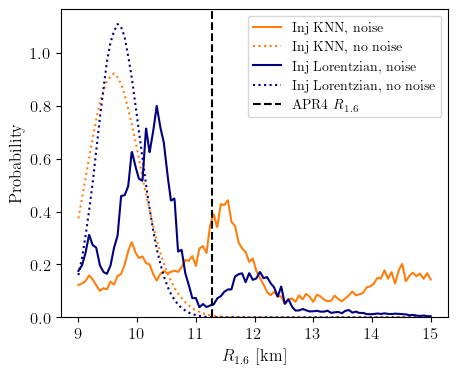

In [4]:
fig = plt.figure(figsize=(5,4))

from scipy.interpolate import interp1d

Rs = np.linspace(9,15,1000)

plt.plot(Rs, interp1d(R1d6s, prob_strain, kind='linear')(Rs), color="C1", label='Inj KNN, noise')
plt.plot(Rs, interp1d(R1d6s, prob_strain_no_noise, kind='linear')(Rs), color="C1", label='Inj KNN, no noise', ls=':')
plt.plot(Rs, interp1d(R1d6s, prob_strain_lorentzian, kind='linear')(Rs), color="navy", label='Inj Lorentzian, noise')
plt.plot(Rs, interp1d(R1d6s, prob_strain_lorentzian_no_noise, kind='linear')(Rs), color="navy", label='Inj Lorentzian, no noise', ls=':')

plt.axvline(11.27, color='k', label=r'APR4 $R_{1.6}$', linestyle='--')

#plt.ylim(0,0.4)
#plt.xlim(10.5,12.5)
plt.ylabel(r'Probability')
plt.xlabel(r'$R_{1.6}$ [km]')

plt.legend(loc='upper right', fontsize=10, frameon=True)

plt.ylim(0,)

(0.0, 1.2)

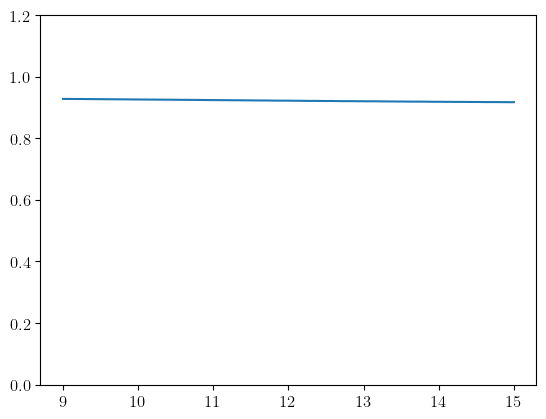

In [8]:
plt.plot(R1d6s, np.exp(loglikelihoods_strain_lorentzian_no_noise[100]))
plt.ylim(0,1.2)


In [35]:
np.sort(np.fft.fftfreq(10000, d=1/1e4))

array([-5000., -4999., -4998., ...,  4997.,  4998.,  4999.])